In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import norm, zscore
# Oversampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [2]:
# Reading the data as dataframe and print the first five rows
df = pd.read_csv(r'https://raw.githubusercontent.com/sharmapratik88/AIML-Projects/master/02_Supervised%20Machine%20Learning/Bank_Personal_Loan_Modelling.csv')
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Data Exploration

In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.isna().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.shape

(5000, 14)

In [8]:
print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [9]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [10]:
df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [11]:
df.std()

ID                    1443.520003
Age                     11.463166
Experience              11.467954
Income                  46.033729
ZIP Code              2121.852197
Family                   1.147663
CCAvg                    1.747659
Education                0.839869
Mortgage               101.713802
Personal Loan            0.294621
Securities Account       0.305809
CD Account               0.238250
Online                   0.490589
CreditCard               0.455637
dtype: float64

In [12]:
display(df['Personal Loan'].value_counts(), df['Personal Loan'].value_counts(normalize = True) * 100)

Personal Loan
0    4520
1     480
Name: count, dtype: int64

Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64

In [13]:
df.loc[df['Experience'] < 0].describe().T

count          mean          std      min       25%  \
ID                   52.0   2427.346154  1478.834118     90.0    767.25   
Age                  52.0     24.519231     1.475159     23.0     24.00   
Experience           52.0     -1.442308     0.639039     -3.0     -2.00   
Income               52.0     69.942308    37.955295     12.0     40.75   
ZIP Code             52.0  93240.961538  1611.654806  90065.0  92167.75   
Family               52.0      2.865385     0.970725      1.0      2.00   
CCAvg                52.0      2.129423     1.750562      0.2      1.00   
Education            52.0      2.076923     0.836570      1.0      1.00   
Mortgage             52.0     43.596154    90.027068      0.0      0.00   
Personal Loan        52.0      0.000000     0.000000      0.0      0.00   
Securities Account   52.0      0.115385     0.322603      0.0      0.00   
CD Account           52.0      0.000000     0.000000      0.0      0.00   
Online               52.0      0.576923     0.498867      0.0      0.00   
CreditCard           52.0      0.288462     0.457467      0.0      0.00   

                        50%        75%      max  
ID                   2783.5   3669.500   4958.0  
Age                    24.0     25.000     29.0  
Experience             -1.0     -1.000     -1.0  
Income                 65.5     86.750    150.0  
ZIP Code            93060.0  94720.000  95842.0  
Family                  3.0      4.000      4.0  
CCAvg                   1.8      2.325      7.2  
Education               2.0      3.000      3.0  
Mortgage                0.0      0.000    314.0  
Personal Loan           0.0      0.000      0.0  
Securities Account      0.0      0.000      1.0  
CD Account              0.0      0.000      0.0  
Online                  1.0      1.000      1.0  
CreditCard              0.0      1.000      1.0

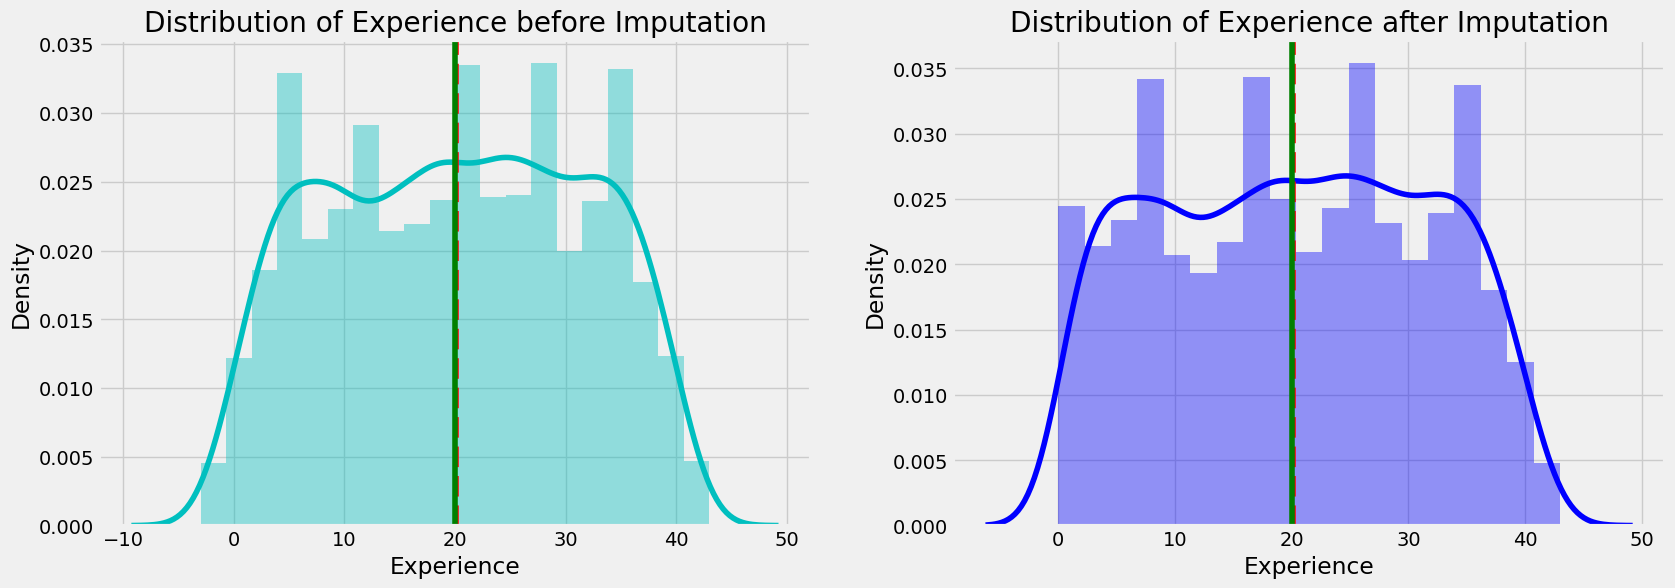

In [14]:
# Checking distribution of Experience column before and after imputation
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
sns.distplot(df['Experience'], color = 'c', ax = ax).set_title('Distribution of Experience before Imputation')
ax.axvline(df['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(df['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')

replace_value = df.loc[(df['Age'] > 23) & (df['Age'] <= 29) & (df['Income'] > 12) & (df['Income'] < 150) & (df['Personal Loan'] == 0) & (df['CD Account'] == 0), 'Experience'].median()

# replacing the negative values with 2
df['Experience'] = np.where(df['Experience'] < 0, replace_value, df['Experience'])

ax = fig.add_subplot(122)
sns.distplot(df['Experience'], color = 'b', ax = ax).set_title('Distribution of Experience after Imputation')
ax.axvline(df['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(df['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')

In [15]:
df['Experience'].describe().T

count    5000.000000
mean       20.140400
std        11.405644
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

## Dealing with negative experience
The observation where experience is marked negative in the dataset is for people with Age range of 23-29 with median and mean being close to 24. These group of people who are marked negative experience in the dataset have Income ranging between 12 to 150, they didn't take Personal Loan that was offered to them in the earlier campaign and niether do they have certificate of deposit account with the bank. Used these findings to impute the negative values in experience. There's a slight but a negligible change in the value of mean from 20.1046 to 20.1404 whereas median value stays unaffected.

Text(0.5, 1.0, 'Distribution of Mortgage for taking Personal Loan')

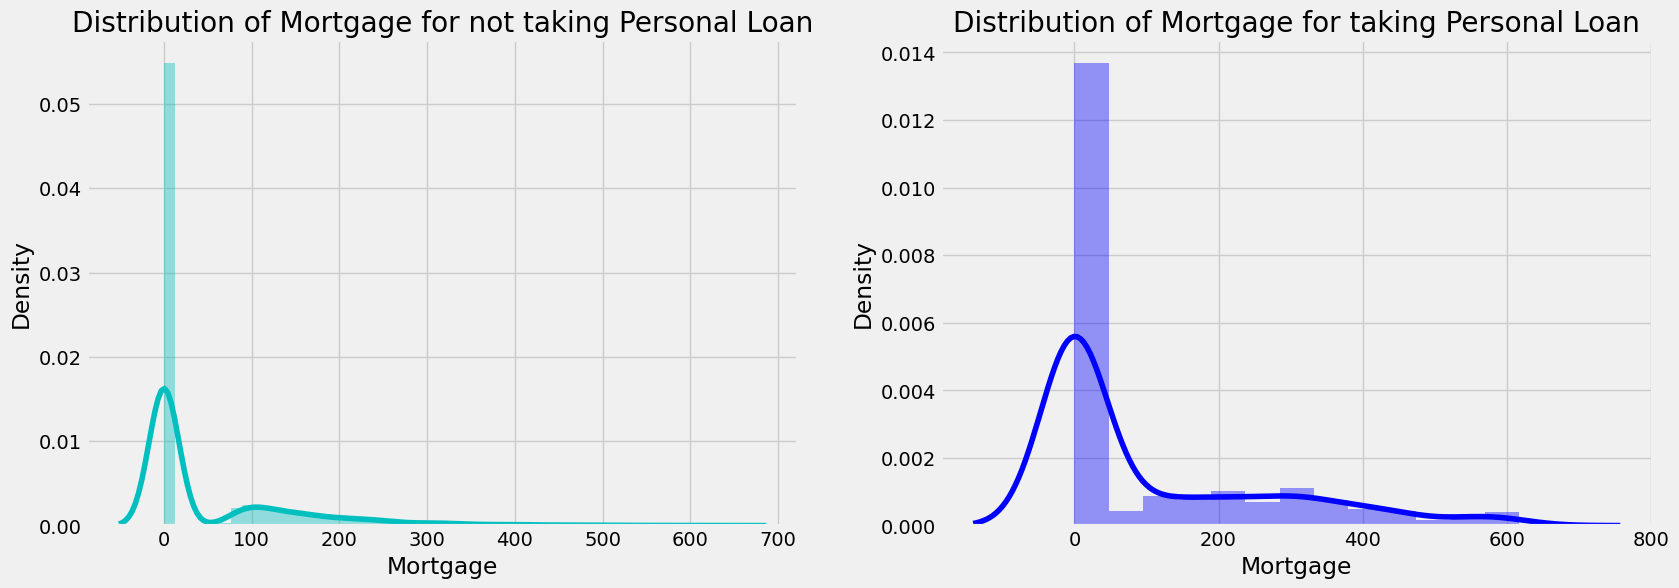

In [17]:
# Distribution of Mortgage
fig = plt.figure(figsize = (18,6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['Mortgage'], color = 'c', 
             ax = ax).set_title('Distribution of Mortgage for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['Mortgage'], color = 'b', 
             ax = ax).set_title('Distribution of Mortgage for taking Personal Loan')

Text(0.5, 1.0, 'Distribution of CCAvg for taking Personal Loan')

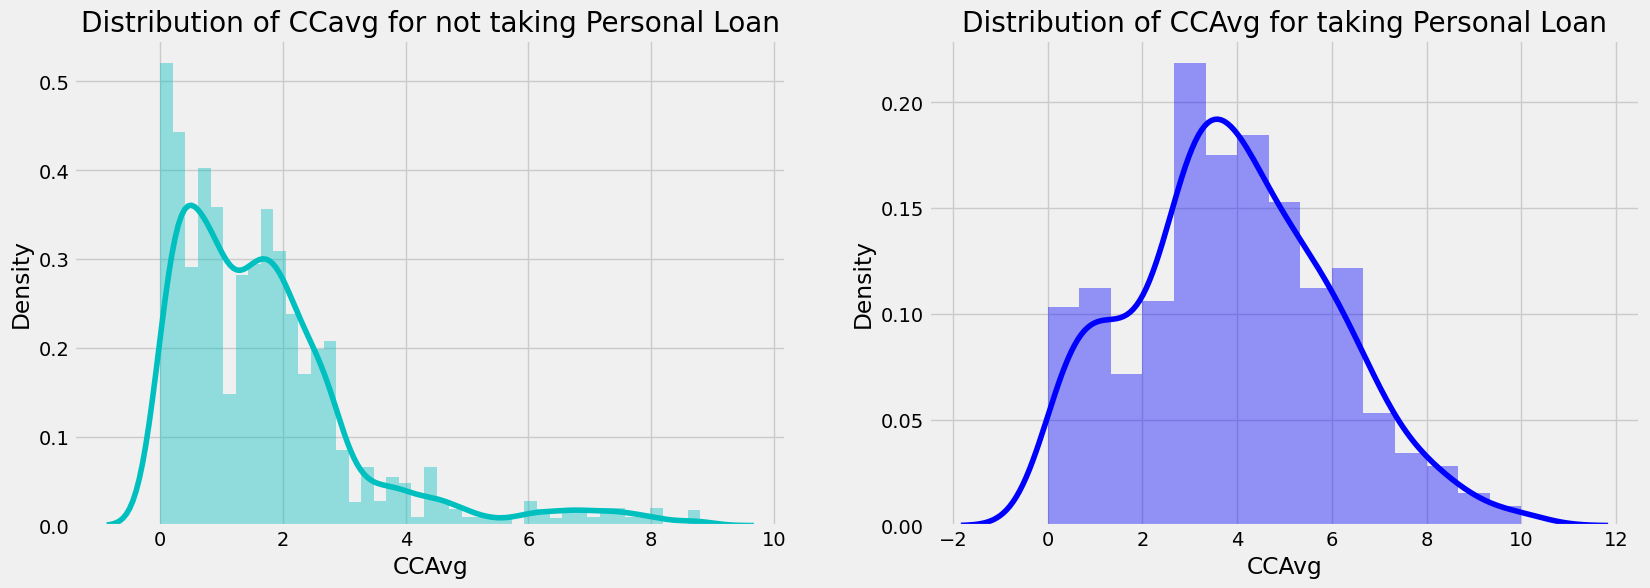

In [18]:
# Distribution of CCAvg
fig = plt.figure(figsize = (18,6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['CCAvg'], color = 'c', ax = ax).set_title('Distribution of CCavg for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['CCAvg'], color = 'b', ax = ax).set_title('Distribution of CCAvg for taking Personal Loan')

Text(0.5, 1.0, 'Distribution of Income for taking Personal Loan')

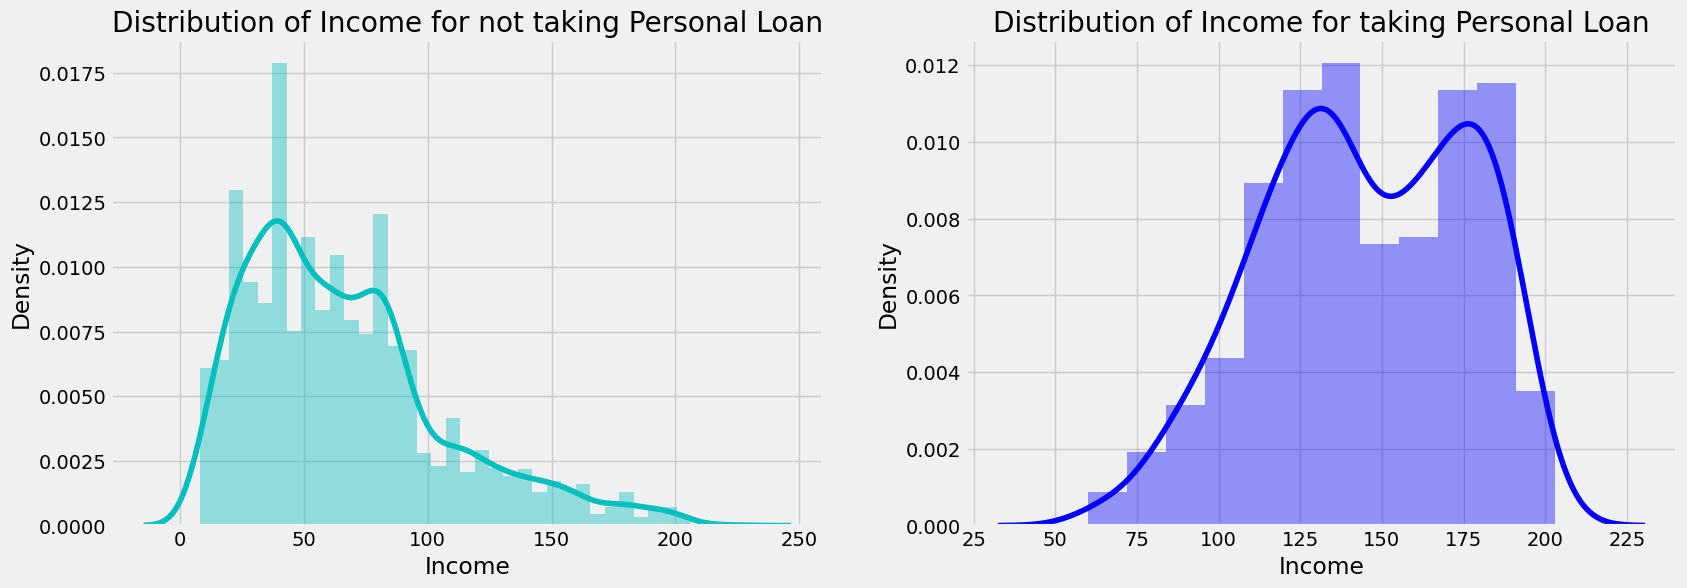

In [19]:
# Distribution of Income
fig = plt.figure(figsize = (18,6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['Income'], color = 'c', ax = ax).set_title('Distribution of Income for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['Income'], color = 'b', ax = ax).set_title('Distribution of Income for taking Personal Loan')

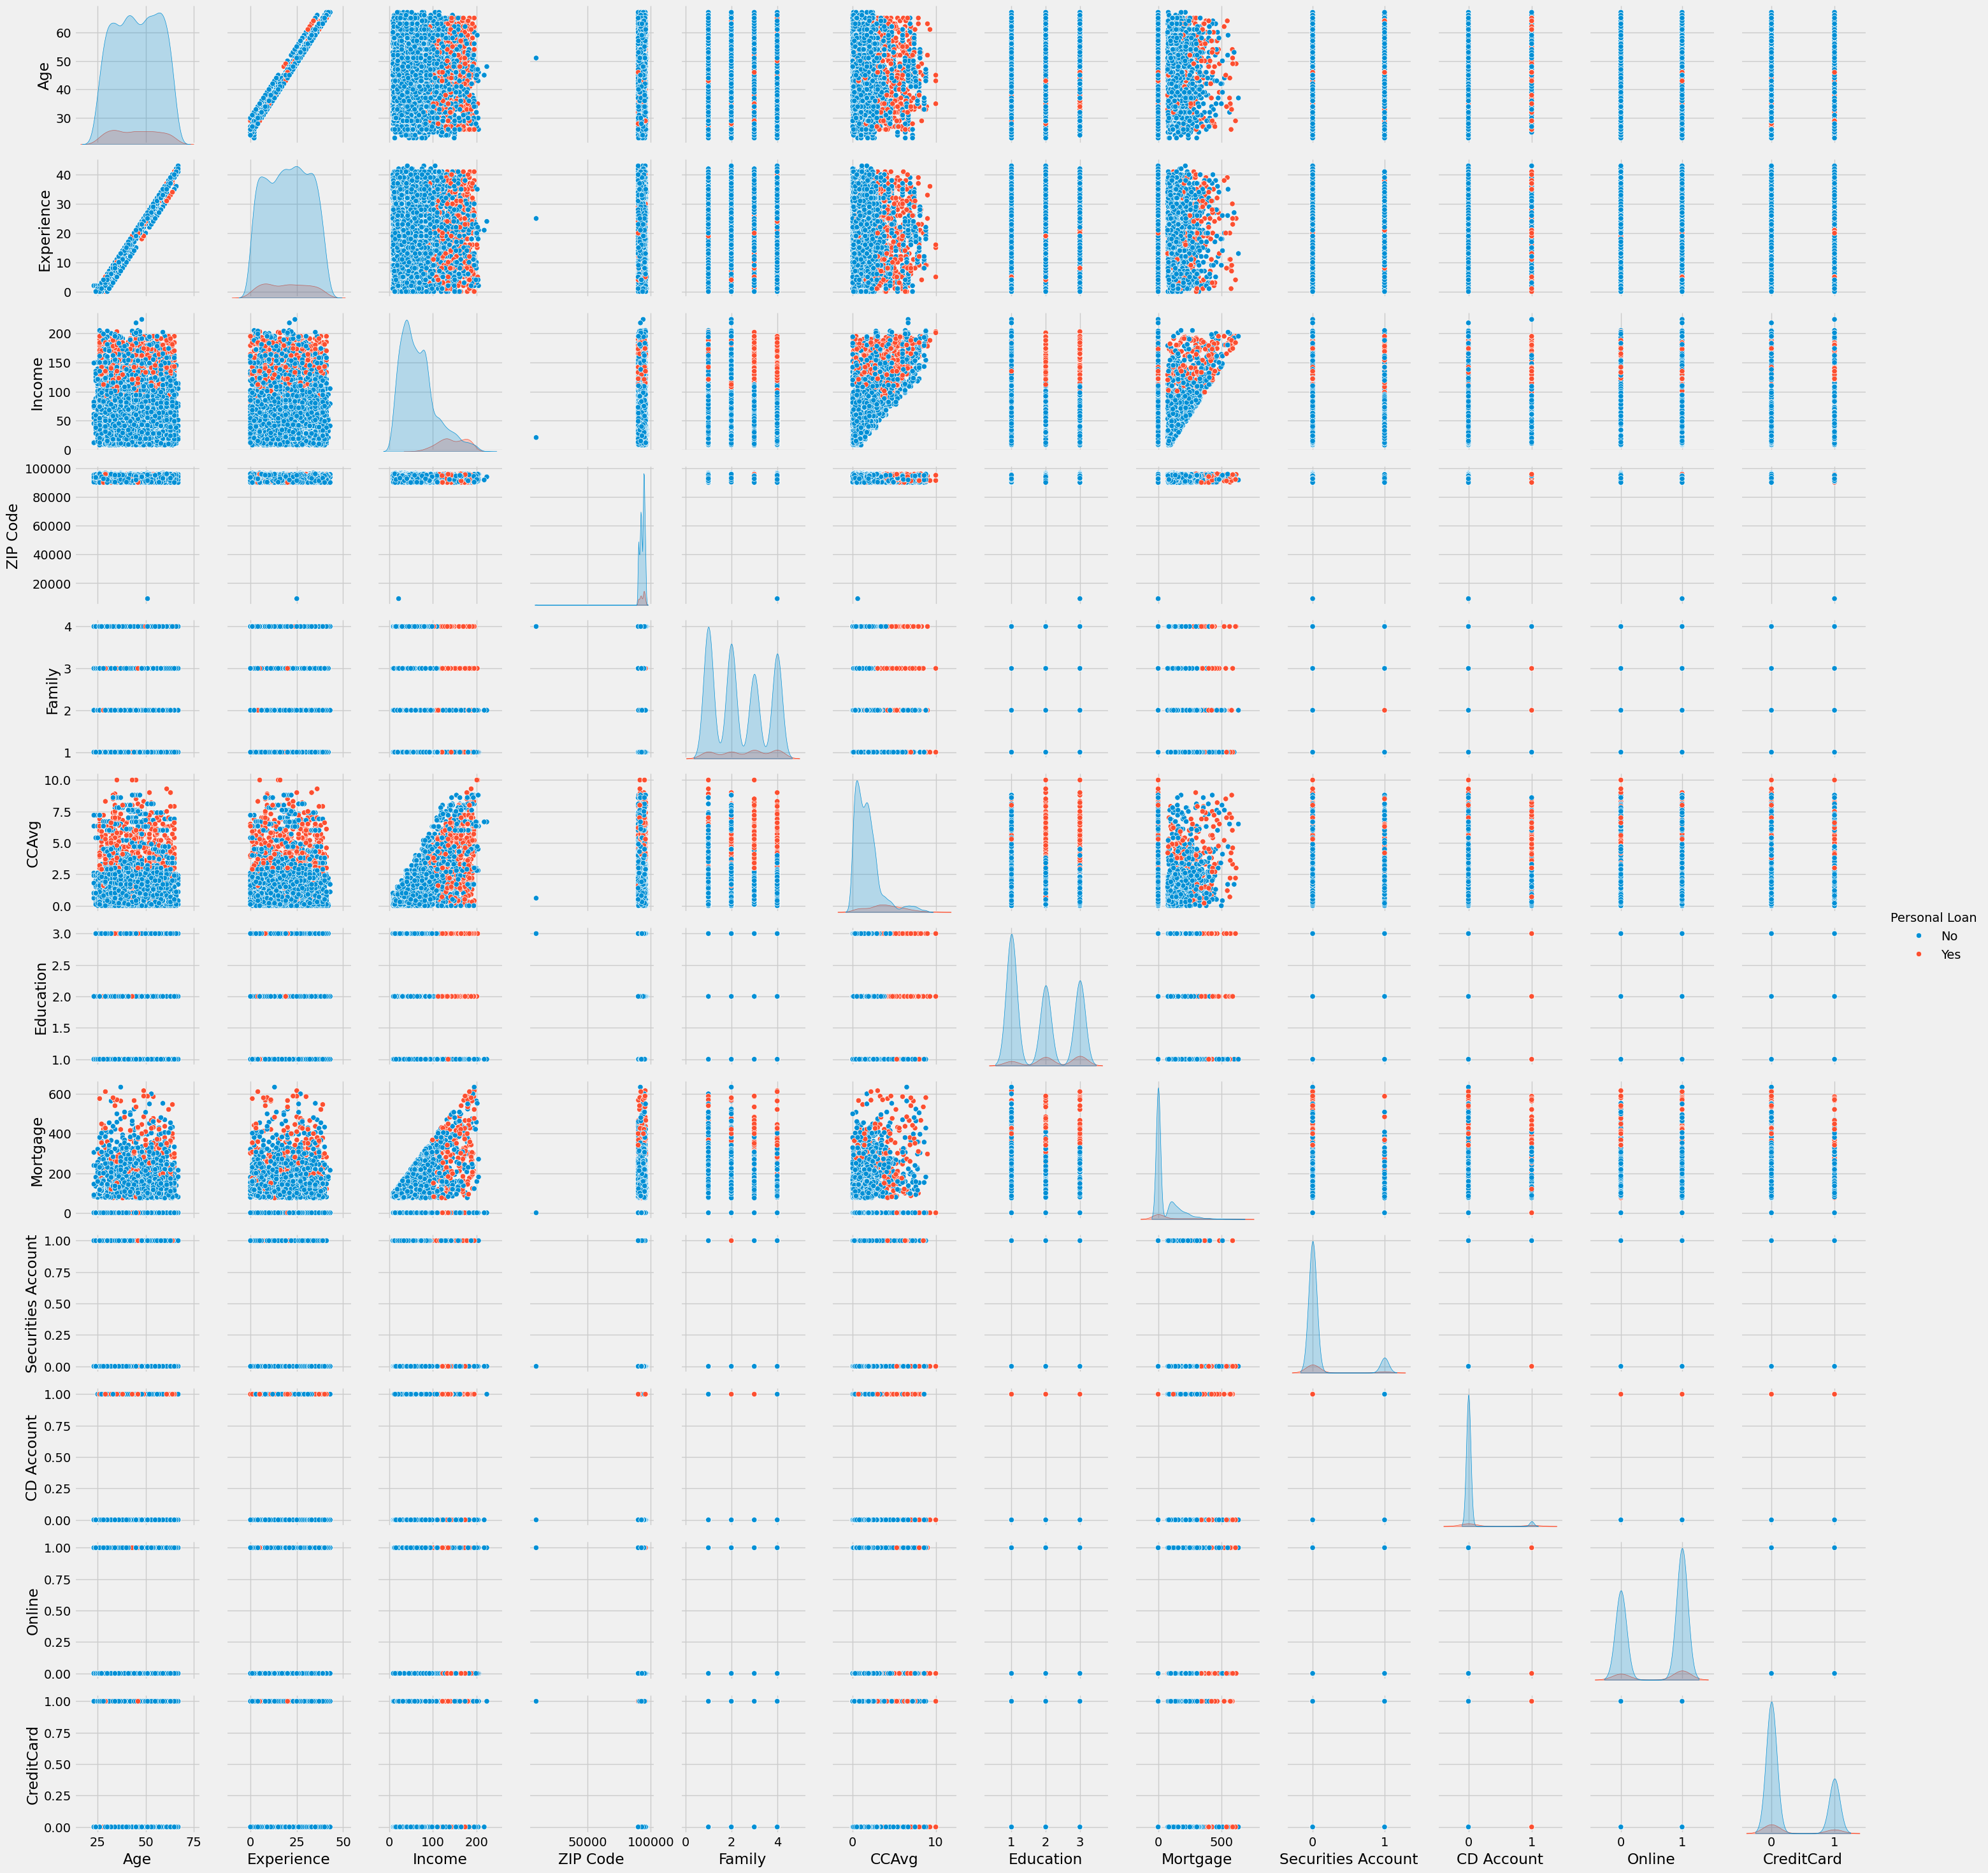

In [20]:
#Pairplot
pp = df.drop('ID', axis = 1)
pp['Personal Loan'] = pp['Personal Loan'].replace({0: 'No', 1: 'Yes'})
sns.pairplot(pp, hue = 'Personal Loan')

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51        25.0      21      9307       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1

<Axes: xlabel='ZIP Code'>

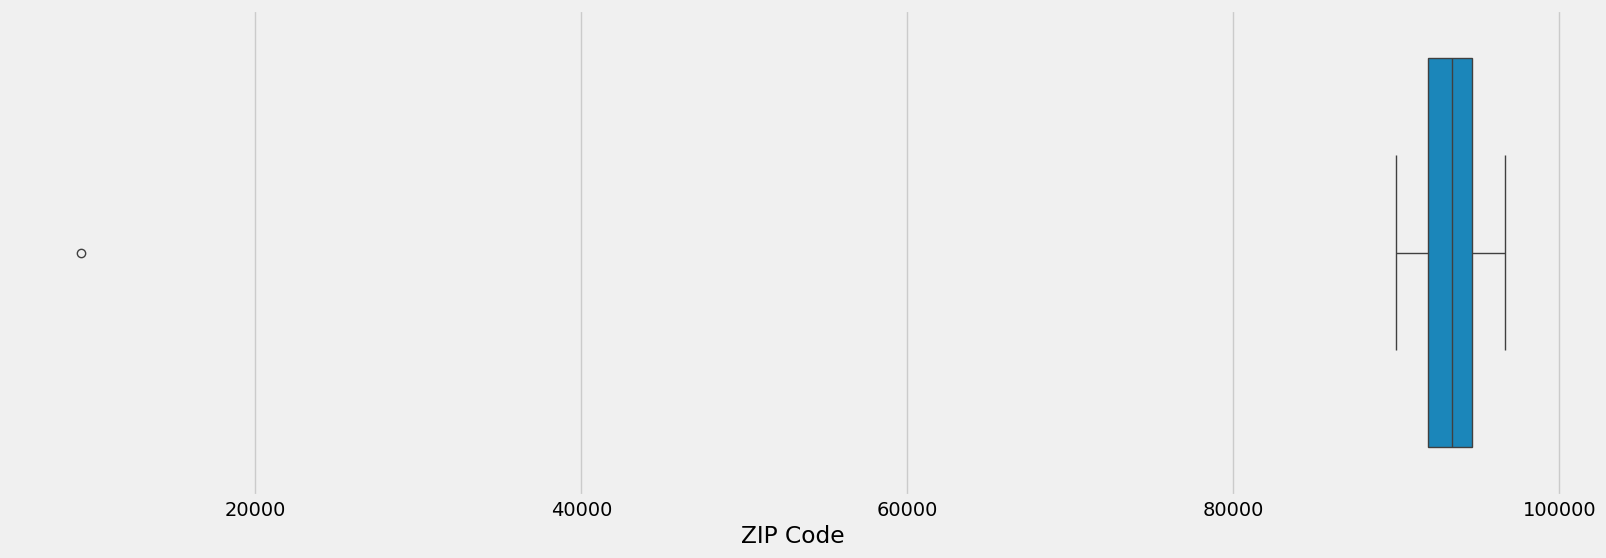

In [21]:
display(df[(df['ZIP Code'] < 10000)])
plt.figure(figsize = (18,6))
sns.boxplot(df['ZIP Code'], orient = 'h')


In [22]:
df.drop(384, axis = 0, inplace=True)

<Axes: xlabel='Personal Loan', ylabel='Income'>

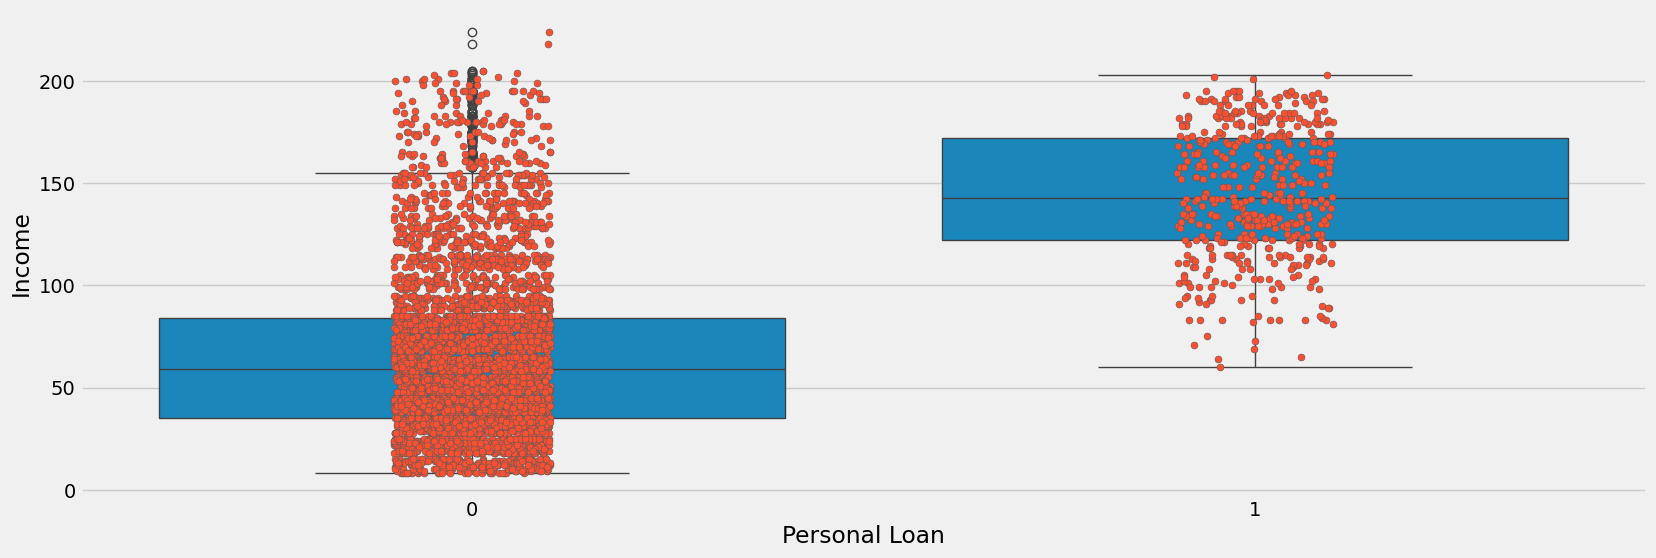

In [23]:
# Distribution of Income by Personal Loan
plt.figure(figsize = (18,6))

sns.boxplot(x = 'Personal Loan', y = 'Income', data = df)
sns.stripplot(x = 'Personal Loan', y = 'Income', data = df, jitter = True, dodge = True, linewidth = 0.4)

Text(0.5, 1.0, 'Distribution of Average Spending on Credit Card by Personal Loan')

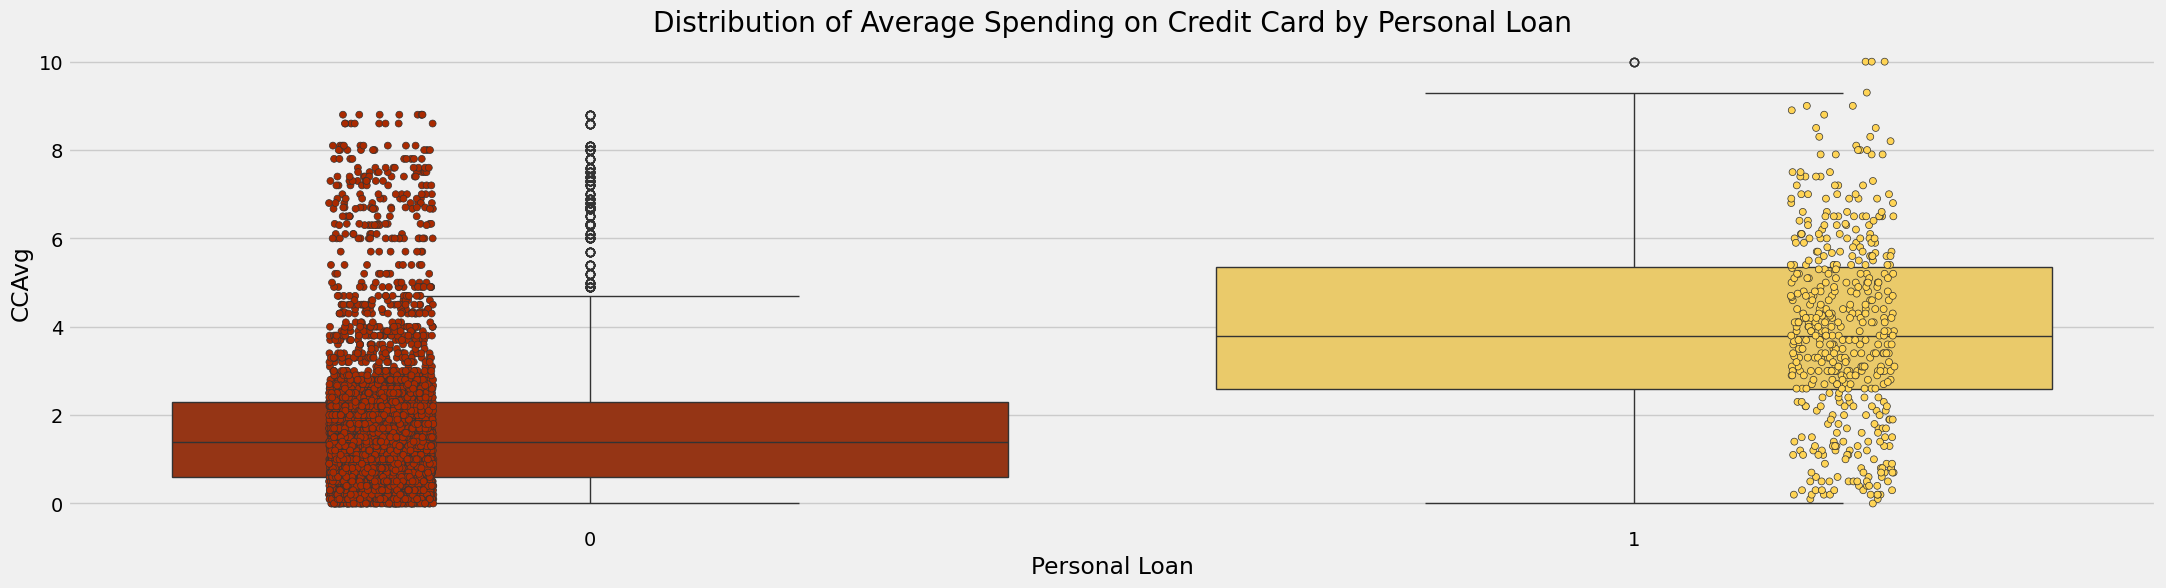

In [24]:
# Distribution of Average Spending on Credit Card by Personal Loan
plt.figure(figsize = (24,6))

ax = fig.add_subplot(121)
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', data = df, palette = 'afmhot')
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', data =df, palette = 'afmhot', jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Average Spending on Credit Card by Personal Loan')

<Figure size 1800x600 with 0 Axes>

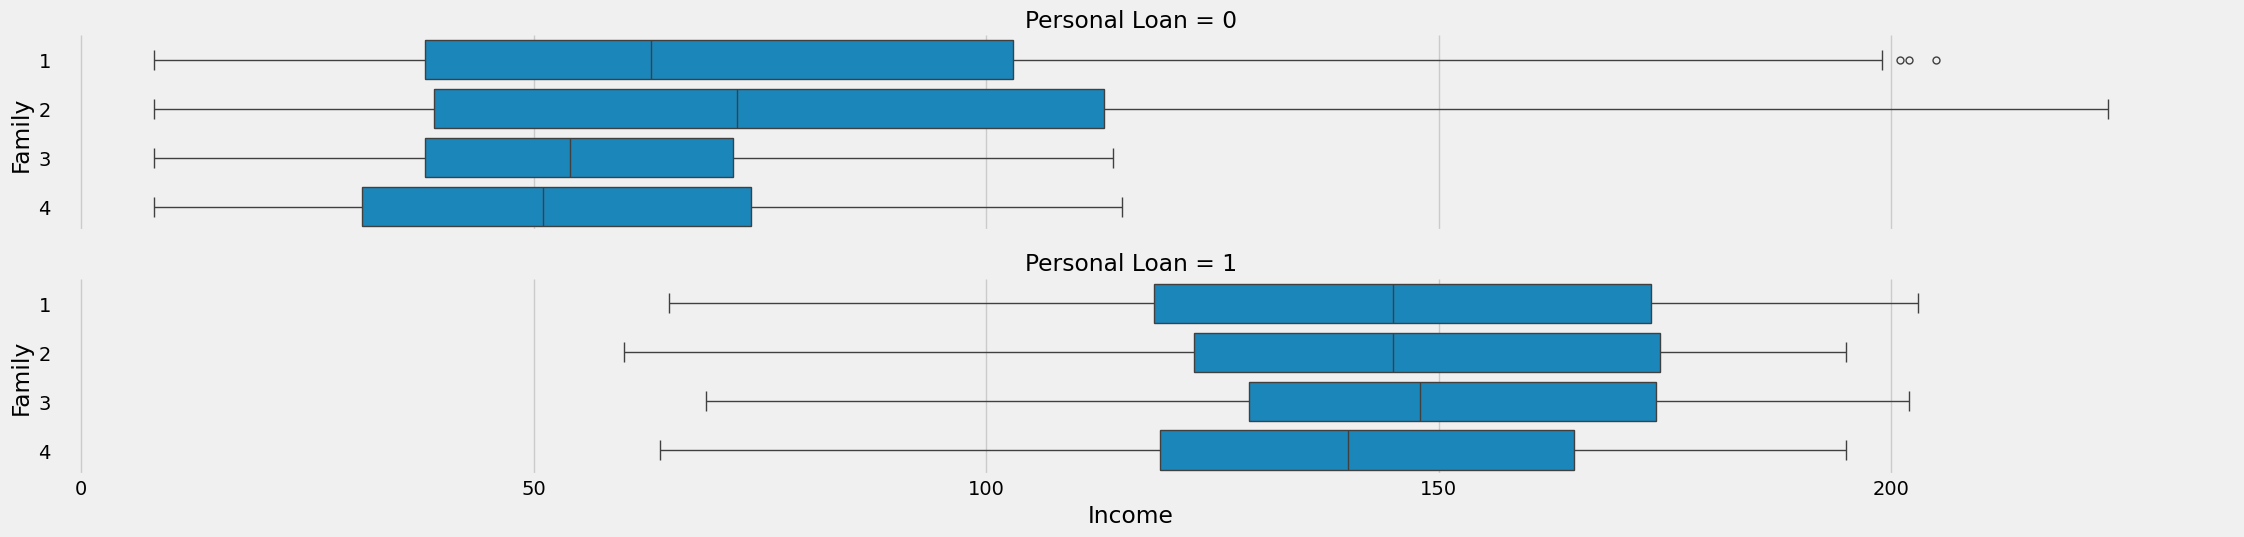

In [25]:
# Distribution of Family Size by Personal Loan and affect of Income
plt.figure(figsize = (18,6))
sns.catplot(x = 'Income', y = 'Family', row = 'Personal Loan', kind = 'box', orient = 'h', data =df, height = 2.8, aspect = 8)

<Figure size 1800x600 with 0 Axes>

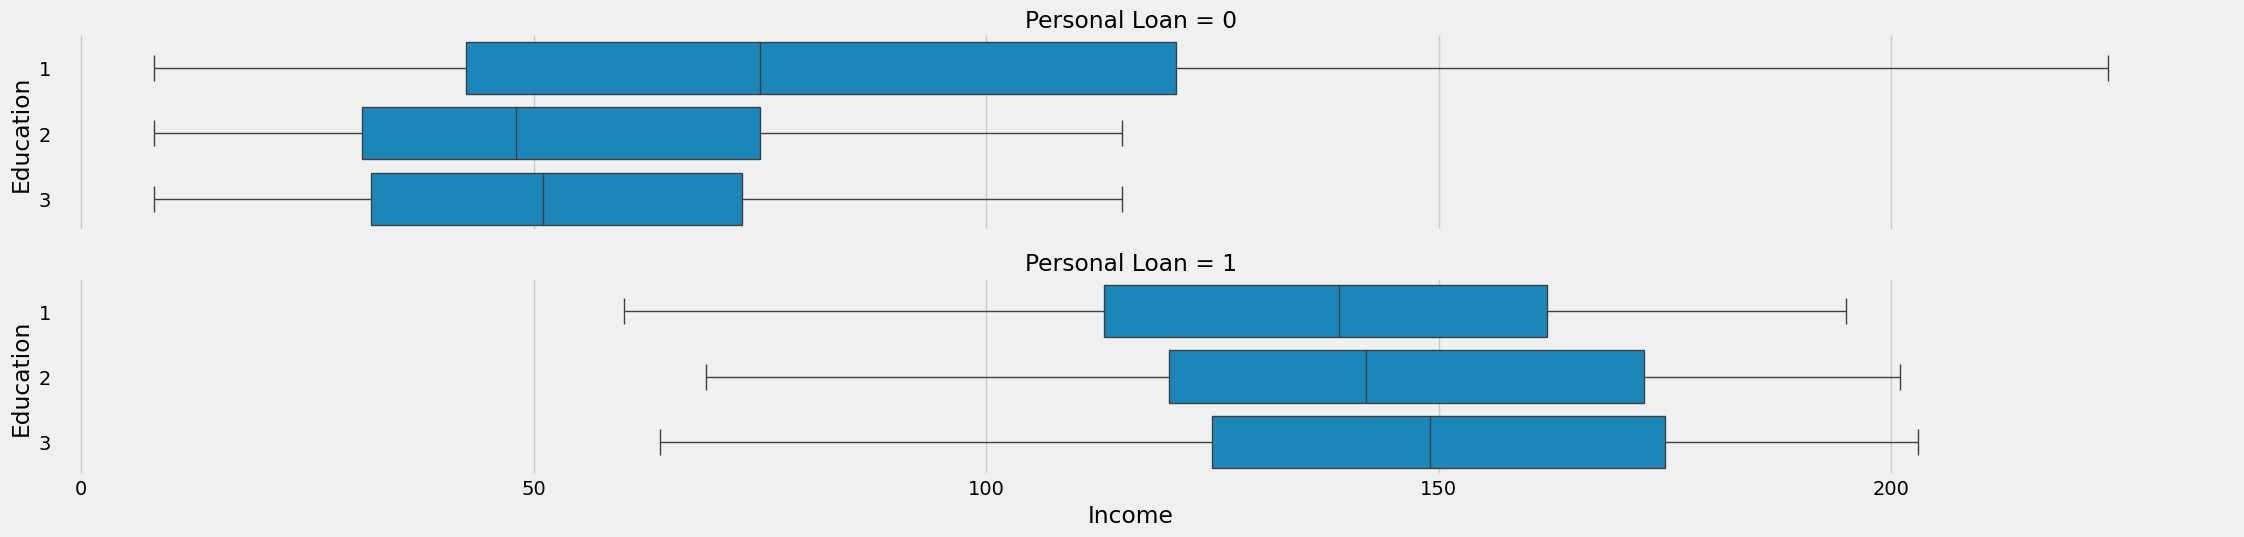

In [26]:
# Distribution of Education by Personal Loan and affect of Income
plt.figure(figsize = (18,6))
sns.catplot(x = 'Income', y = 'Education', row = 'Personal Loan', kind = 'box', orient = 'h', data =df, height = 2.8, aspect = 8)

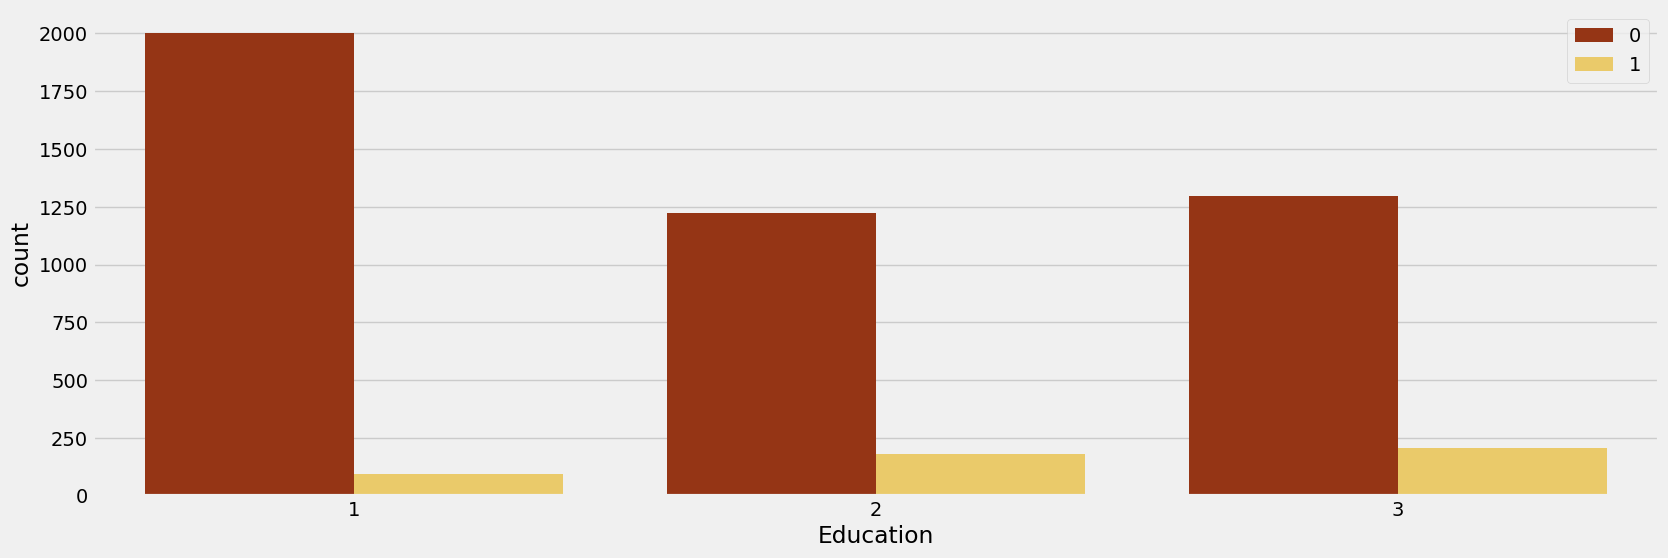

In [27]:
# Countplot of Education by Personal Loan
df['Education'] = df['Education'].astype(str)
df['Personal Loan'] = df['Personal Loan'].astype(str)

plt.figure(figsize = (18,6))
sns.countplot(x = 'Education', hue = 'Personal Loan', data = df, palette = 'afmhot')
plt.legend()
plt.show()

In [28]:
#Converting back to int
df['Education'] = df['Education'].astype('int64')
df['Personal Loan'] = df['Personal Loan'].astype('int64')

In [29]:
df.dtypes

ID                      int64
Age                     int64
Experience            float64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

<Axes: xlabel='CD Account', ylabel='count'>

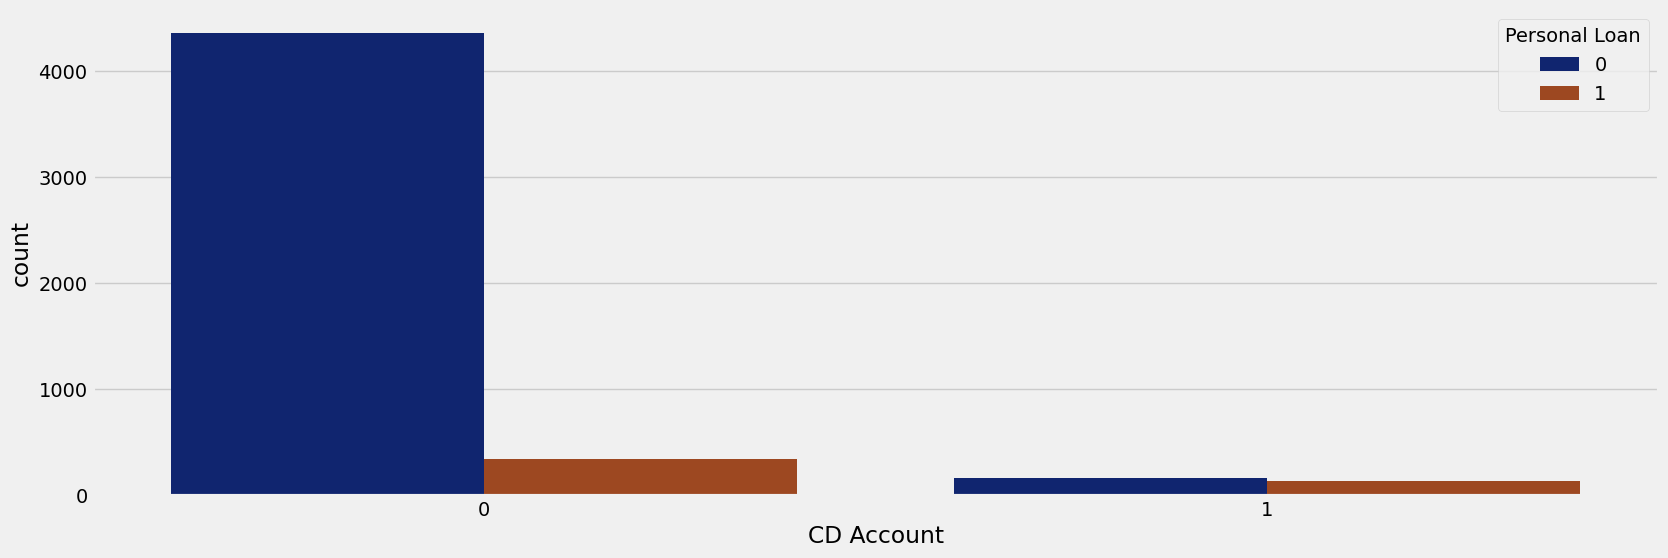

In [30]:
# Countplot of CD Account by Personal Loan
df['CD Account'] = df['CD Account'].astype(str)
df['Personal Loan'] = df['Personal Loan'].astype(str)

plt.figure(figsize = (18,6))
sns.countplot(data = df, x = 'CD Account', hue = 'Personal Loan', palette = 'dark')

In [31]:
df['CD Account'] = df['CD Account'].astype('int64')
df['Personal Loan'] = df['Personal Loan'].astype('int64')

In [32]:
df.dtypes
cat_cols = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
df[cat_cols].nunique()

ZIP Code              466
Family                  4
Education               3
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [33]:
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [34]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25         1.0      49       4    1.6          1         0              0   
1   45        19.0      34       3    1.5          1         0              0   
2   39        15.0      11       1    1.0          1         0              0   
3   35         9.0     100       1    2.7          2         0              0   
4   35         8.0      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

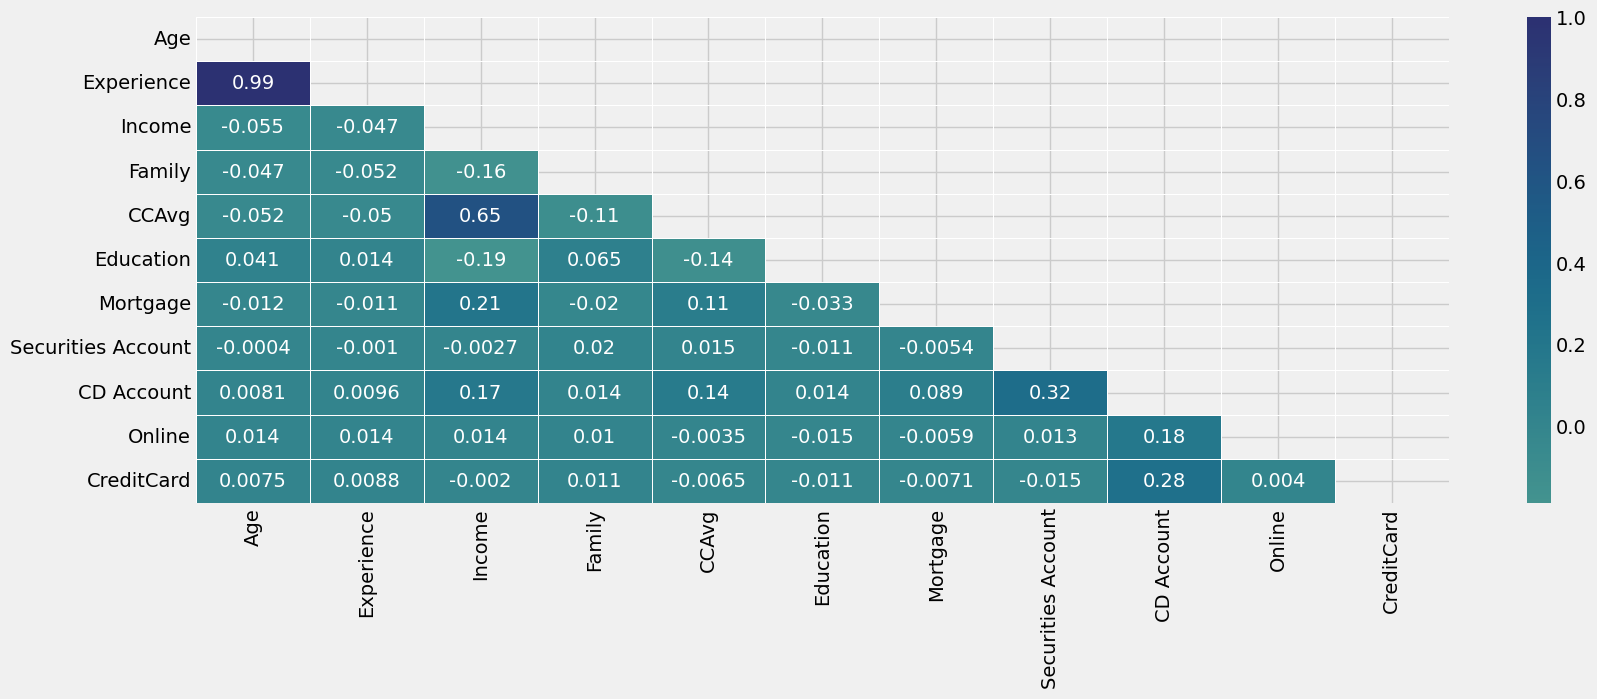

In [35]:
#Correlation
corr = df.drop('Personal Loan', axis = 1).corr()

#mask = np.zeros_like(corr, dtype = np.bool)
#mask[np.triu_indices_from(mask)] = True
mask = np.zeros_like(corr, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize = (18,6))

sns.heatmap(corr, annot = True, mask = mask, cmap = 'crest' , linewidths=0.5, vmax=1, center=0)
plt.show()

In [36]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25         1.0      49       4    1.6          1         0              0   
1   45        19.0      34       3    1.5          1         0              0   
2   39        15.0      11       1    1.0          1         0              0   
3   35         9.0     100       1    2.7          2         0              0   
4   35         8.0      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [37]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort=sort.sort_values(kind = 'quicksort', ascending = False)
sort[(sort > 0.5) & (sort < 1)]
display(corr)

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.993922 -0.055164 -0.046566 -0.051941   
Experience          0.993922    1.000000 -0.046933 -0.051757 -0.049803   
Income             -0.055164   -0.046933  1.000000 -0.157232  0.645931   
Family             -0.046566   -0.051757 -0.157232  1.000000 -0.109088   
CCAvg              -0.051941   -0.049803  0.645931 -0.109088  1.000000   
Education           0.041211    0.013892 -0.187277  0.064581 -0.135952   
Mortgage           -0.012484   -0.011057  0.206712 -0.020294  0.109829   
Securities Account -0.000403   -0.001020 -0.002695  0.020094  0.015035   
CD Account          0.008068    0.009636  0.169703  0.014184  0.136504   
Online              0.013622    0.013875  0.014397  0.010127 -0.003486   
CreditCard          0.007530    0.008786 -0.002030  0.011160 -0.006454   

                    Education  Mortgage  Securities Account  CD Account  \
Age                  0.041211 -0.012484           -0.000403    0.008068   
Experience           0.013892 -0.011057           -0.001020    0.009636   
Income              -0.187277  0.206712           -0.002695    0.169703   
Family               0.064581 -0.020294            0.020094    0.014184   
CCAvg               -0.135952  0.109829            0.015035    0.136504   
Education            1.000000 -0.033186           -0.010723    0.014004   
Mortgage            -0.033186  1.000000           -0.005449    0.089286   
Securities Account  -0.010723 -0.005449            1.000000    0.317023   
CD Account           0.014004  0.089286            0.317023    1.000000   
Online              -0.015227 -0.005904            0.012685    0.175935   
CreditCard          -0.011432 -0.007061           -0.014926    0.278792   

                      Online  CreditCard  
Age                 0.013622    0.007530  
Experience          0.013875    0.008786  
Income              0.014397   -0.002030  
Family              0.010127    0.011160  
CCAvg              -0.003486   -0.006454  
Education          -0.015227   -0.011432  
Mortgage           -0.005904   -0.007061  
Securities Account  0.012685   -0.014926  
CD Account          0.175935    0.278792  
Online              1.000000    0.003956  
CreditCard          0.003956    1.000000

In [38]:
# Absolute correlation of independent variables with 'Personal Loan' i.e. the target variable
abscor = []
allvars = df.drop('Personal Loan', axis = 1).columns

for i in allvars:
    abscor.append(abs(df['Personal Loan'].corr(df[i])))
display(pd.DataFrame([allvars, abscor], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

Variable Correlation
2               Income    0.502459
4                CCAvg    0.366864
8           CD Account    0.316344
6             Mortgage    0.142065
5            Education    0.136834
3               Family    0.061471
7   Securities Account    0.021932
1           Experience    0.008449
0                  Age    0.007694
9               Online    0.006332
10          CreditCard    0.002903

## Modelling

In [40]:
df.drop(['Age', 'Online', 'CreditCard'], axis = 1, inplace = True)
df.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account'],
      dtype='object')

In [41]:
x = df.drop(['Personal Loan'], axis = 1)
y = df['Personal Loan']
display(x.describe().T, x.shape, y.shape)

count       mean         std  min   25%   50%    75%  \
Experience          4999.0  20.139428   11.406577  0.0  10.0  20.0   30.0   
Income              4999.0  73.784757   46.032281  8.0  39.0  64.0   98.0   
Family              4999.0   2.396079    1.147554  1.0   1.0   2.0    3.0   
CCAvg               4999.0   1.938206    1.747731  0.0   0.7   1.5    2.5   
Education           4999.0   1.880776    0.839804  1.0   1.0   2.0    3.0   
Mortgage            4999.0  56.510102  101.720837  0.0   0.0   0.0  101.0   
Securities Account  4999.0   0.104421    0.305836  0.0   0.0   0.0    0.0   
CD Account          4999.0   0.060412    0.238273  0.0   0.0   0.0    0.0   

                      max  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Securities Account    1.0  
CD Account            1.0

(4999, 8)

(4999,)

# Logistic Regression

In [43]:
#Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

Logistic Regression Scores without Hyperparameter Tuning


LR accuracy for train set: 0.951
LR accuracy for test set: 0.943

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1397
           1       0.56      0.80      0.66       103

    accuracy                           0.94      1500
   macro avg       0.77      0.88      0.81      1500
weighted avg       0.96      0.94      0.95      1500


Confusion Matrix:
 [[1333   64]
 [  21   82]]

Accuracy score:
 0.943


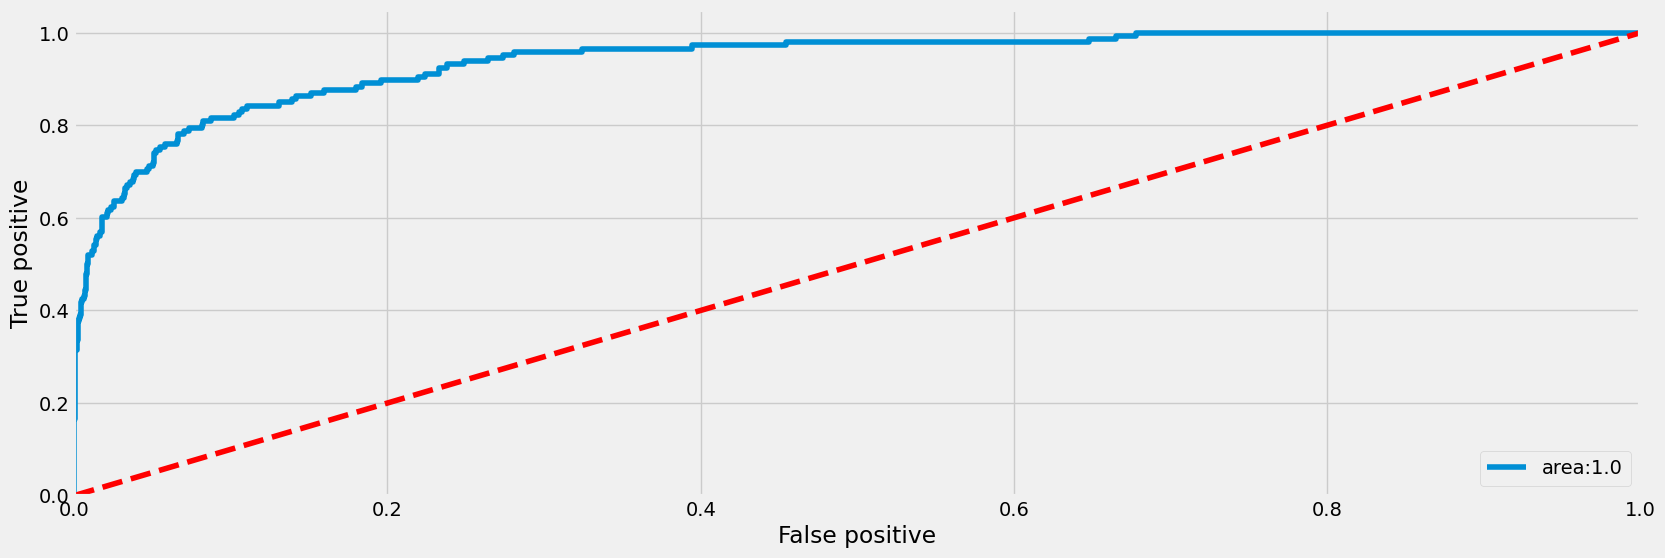

In [44]:
## LR model without hyperparameter tuning
LR = LogisticRegression()
LR.fit(x_train, y_train)

print('Logistic Regression Scores without Hyperparameter Tuning\n\n')
print('LR accuracy for train set: {0:.3f}'.format(LR.score(x_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR.score(x_test, y_test)))

y_pred, y_true = y_test, LR.predict(x_test)

#Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

#Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

#Accuracy score
auc = accuracy_score(y_true, y_pred)
print("\nAccuracy score:\n", auc.round(3))

#ROC Curve
roc_aoc = roc_auc_score(y_true, LR.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, LR.predict_proba(x_test)[:,1])

fig = plt.figure(figsize = (18,6))
plt.plot(fpr, tpr, label = 'area:{}'.format(roc_aoc.round(2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc = 'lower right')
plt.show()

Logistic Regression Scores with Hyperparameter Tuning


Best params: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}

Best score: 
LR accuracy for train set: 0.949
LR accuracy for test set: 0.941

Confusion matrix
[[1328   26]
 [  62   84]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1354
           1       0.76      0.58      0.66       146

    accuracy                           0.94      1500
   macro avg       0.86      0.78      0.81      1500
weighted avg       0.94      0.94      0.94      1500



Accuracy Score
0.941



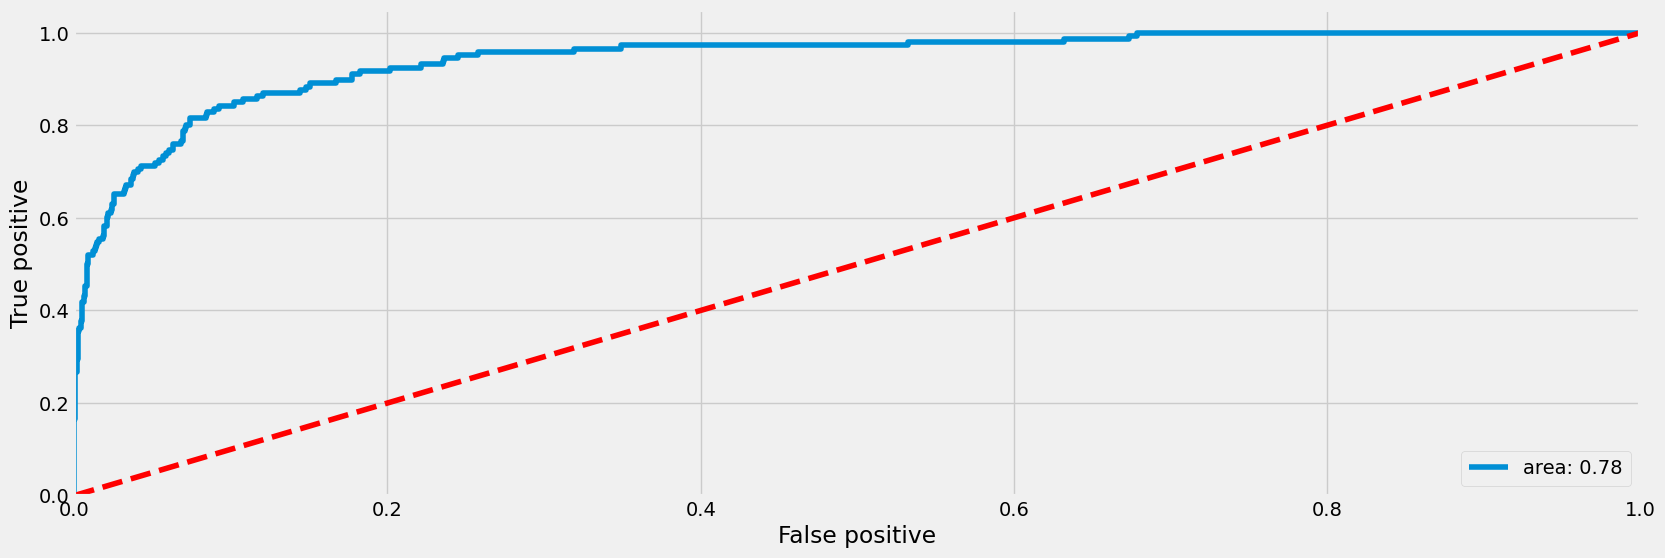

In [45]:
# LR with hyperparameter tuning
LR = LogisticRegression(random_state=42)
params = {'penalty': ['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 0, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}
skf = StratifiedKFold(n_splits = 10)

LR_hyper = GridSearchCV(LR, param_grid = params, cv = skf, n_jobs = -1)
LR_hyper.fit(x_train, y_train)

print('Logistic Regression Scores with Hyperparameter Tuning\n\n')
print("Best params: {}\n".format(LR_hyper.best_params_))
print("Best score: ".format(LR_hyper.best_score_.round(3)))

print('LR accuracy for train set: {0:.3f}'.format(LR_hyper.score(x_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR_hyper.score(x_test, y_test)))

y_true, y_pred = y_test, LR_hyper.predict(x_test)

#Confusion matrix
print("\nConfusion matrix\n{}\n".format(confusion_matrix(y_true, y_pred)))

#Classification report
print("\nClassification Report\n{}\n".format(classification_report(y_true, y_pred)))

#Accuracy score
print("\nAccuracy Score\n{}\n".format(accuracy_score(y_true, y_pred).round(3)))

#AOC ROC curve
hyper_roc_aoc = roc_auc_score(y_true, LR_hyper.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, LR_hyper.predict_proba(x_test)[:,1])

fig = plt.figure(figsize = (18,6))
plt.plot(fpr, tpr, label = 'area: {}'.format(hyper_roc_aoc.round(2)))

plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.legend(loc = 'lower right')
plt.show()

## KNN

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3) 
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

k-Nearest Neighbor Classifier Scores without feature scaling


k-NN accuracy for train set: 0.941
k-NN accuracy for test set: 0.907

Confusion matrix:
[[1317   37]
 [ 102   44]]


Accuracy score:0.91


 Classification report              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1354
           1       0.54      0.30      0.39       146

    accuracy                           0.91      1500
   macro avg       0.74      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500




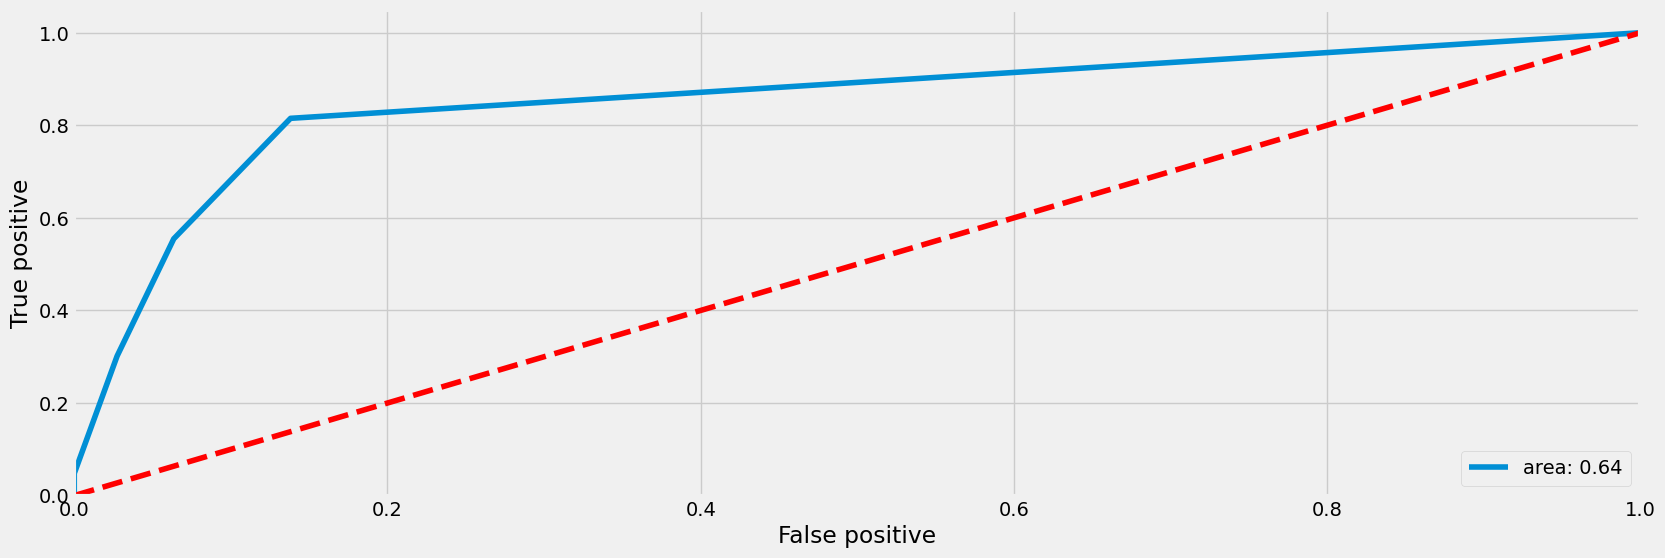

In [48]:
# KNN Model without scaling the features
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print('k-Nearest Neighbor Classifier Scores without feature scaling\n\n')
print("k-NN accuracy for train set: {0:.3f}".format(knn.score(x_train, y_train)))
print("k-NN accuracy for test set: {0:.3f}".format(knn.score(x_test, y_test)))

y_true, y_pred = y_test, knn.predict(x_test)

#Confusion matrix
print("\nConfusion matrix:\n{}\n".format(confusion_matrix(y_true, y_pred)))

#Accuracy score
print("\nAccuracy score:{}\n".format(accuracy_score(y_true, y_pred).round(2)))

#Classification report
print("\n Classification report{}\n".format(classification_report(y_true, y_pred)))

#ROC AOC curve
roc = roc_auc_score(y_true, knn.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

fig = plt.figure(figsize = (18,6))
plt.plot(fpr, tpr, label = 'area: {}'.format(roc.round(2)))

plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.legend(loc = 'lower right')
plt.show()

In [49]:
# Scaling the independent variables
x = x.apply(zscore)
display(x.describe().T, x.shape, y.shape)

count          mean     std       min       25%  \
Experience          4999.0 -1.371622e-16  1.0001 -1.765774 -0.889000   
Income              4999.0 -8.528218e-18  1.0001 -1.429243 -0.755736   
Family              4999.0  1.208164e-16  1.0001 -1.216692 -1.216692   
CCAvg               4999.0  3.269150e-17  1.0001 -1.109095 -0.708535   
Education           4999.0 -1.222378e-16  1.0001 -1.048893 -1.048893   
Mortgage            4999.0 -2.416329e-17  1.0001 -0.555597 -0.555597   
Securities Account  4999.0  5.685479e-18  1.0001 -0.341461 -0.341461   
CD Account          4999.0 -5.756547e-17  1.0001 -0.253567 -0.253567   

                         50%       75%       max  
Experience         -0.012225  0.864550  2.004358  
Income             -0.212584  0.526102  3.263585  
Family             -0.345185  0.526321  1.397827  
CCAvg              -0.250753  0.321474  4.613181  
Education           0.141980  1.332854  1.332854  
Mortgage           -0.555597  0.437416  5.687603  
Securities Account -0.341461 -0.341461  2.928588  
CD Account         -0.253567 -0.253567  3.943727

(4999, 8)

(4999,)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning


k-NN accuracy for train set:0.976
k-NN accuracy for test set:0.961

Confusion matrix:
[[1349    5]
 [  54   92]]


Accuarcy score:0.96


Classification report:              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1354
           1       0.95      0.63      0.76       146

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500




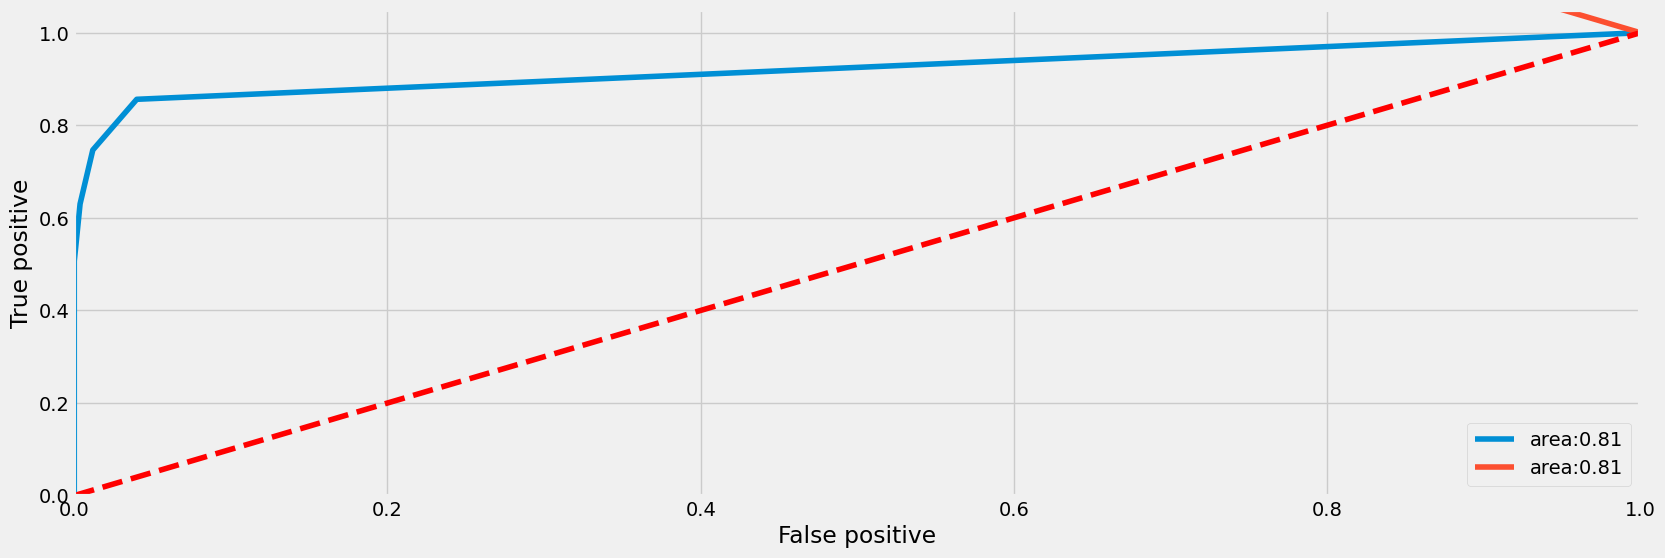

In [51]:
# KNN Model after scaling the features without hyperparameter tuning
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning\n\n')
print('k-NN accuracy for train set:{:.3f}'.format(knn.score(x_train, y_train)))
print('k-NN accuracy for test set:{:.3f}'.format(knn.score(x_test, y_test)))

y_true, y_pred = y_test, knn.predict(x_test)

#Confusion matrix
print("\nConfusion matrix:\n{}\n".format(confusion_matrix(y_true, y_pred)))

#Accuracy score
print("\nAccuarcy score:{}\n".format(accuracy_score(y_true, y_pred).round(2)))

#Classification report
print("\nClassification report:{}\n".format(classification_report(y_test, y_pred)))

#ROC AOC score
roc_aoc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

fig = plt.figure(figsize = (18,6))
plt.plot(fpr, tpr, threshold, label = 'area:{}'.format(roc_aoc.round(2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.legend(loc = 'lower right')
plt.show()

k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

Best Score is:  0.969
k-Nearest Neighbor Classifier Scores after Scaling with Hyperparameter Tuning


k-NN accuracy for train set: 1.000
k-NN accuracy for test set: 0.965

Confusion matrix:
[[1351    3]
 [  49   97]]


Accuracy Score:0.97


Classification Report:              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1354
           1       0.97      0.66      0.79       146

    accuracy                           0.97      1500
   macro avg       0.97      0.83      0.88      1500
weighted avg       0.97      0.97      0.96      1500
 



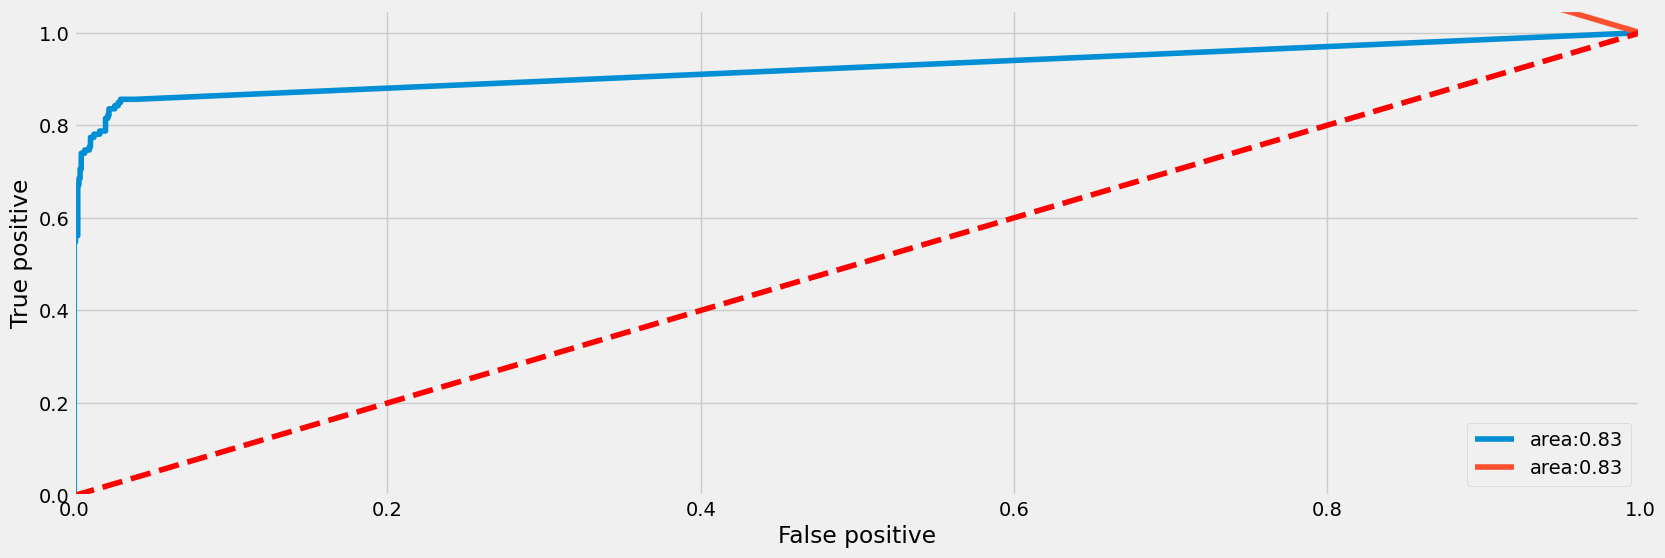

In [52]:
# KNN Model after scaling the features with hyperparameter tuning
knn = KNeighborsClassifier(n_jobs=-1)
params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree']}
skf = StratifiedKFold(n_splits = 10)

knn_hyper = GridSearchCV(knn, param_grid = params, n_jobs = -1, cv = skf)
knn_hyper.fit(x_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', knn_hyper.best_params_)
print('\nBest Score is: ', knn_hyper.best_score_.round(3))

print('k-Nearest Neighbor Classifier Scores after Scaling with Hyperparameter Tuning\n\n')
print('k-NN accuracy for train set: {:.3f}'.format(knn_hyper.score(x_train, y_train)))
print('k-NN accuracy for test set: {:.3f}'.format(knn_hyper.score(x_test, y_test)))

y_true, y_pred = y_test, knn_hyper.predict(x_test)

#Confusion matrix
print('\nConfusion matrix:\n{}\n'.format(confusion_matrix(y_true, y_pred)))

#Accuracy Score
print('\nAccuracy Score:{}\n'.format(accuracy_score(y_true, y_pred).round(2)))

#Classification Report
print("\nClassification Report:{} \n".format(classification_report(y_true, y_pred)))

#ROC AOC score
roc_aoc = roc_auc_score(y_test, knn_hyper.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, knn_hyper.predict_proba(x_test)[:,1])

fig = plt.figure(figsize = (18,6))
plt.plot(fpr, tpr, threshold, label = 'area:{}'.format(roc_aoc.round(2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.legend(loc = 'lower right')
plt.show()

## Naive Bayes Classifier

Naive Bayes Classifier Scores


NB accuracy for train set: 0.883
NB accuracy for test set: 0.893

Confusion matrix
[[1253  101]
 [  60   86]]


Accuracy Score:0.89


Classification report              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1354
           1       0.46      0.59      0.52       146

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500




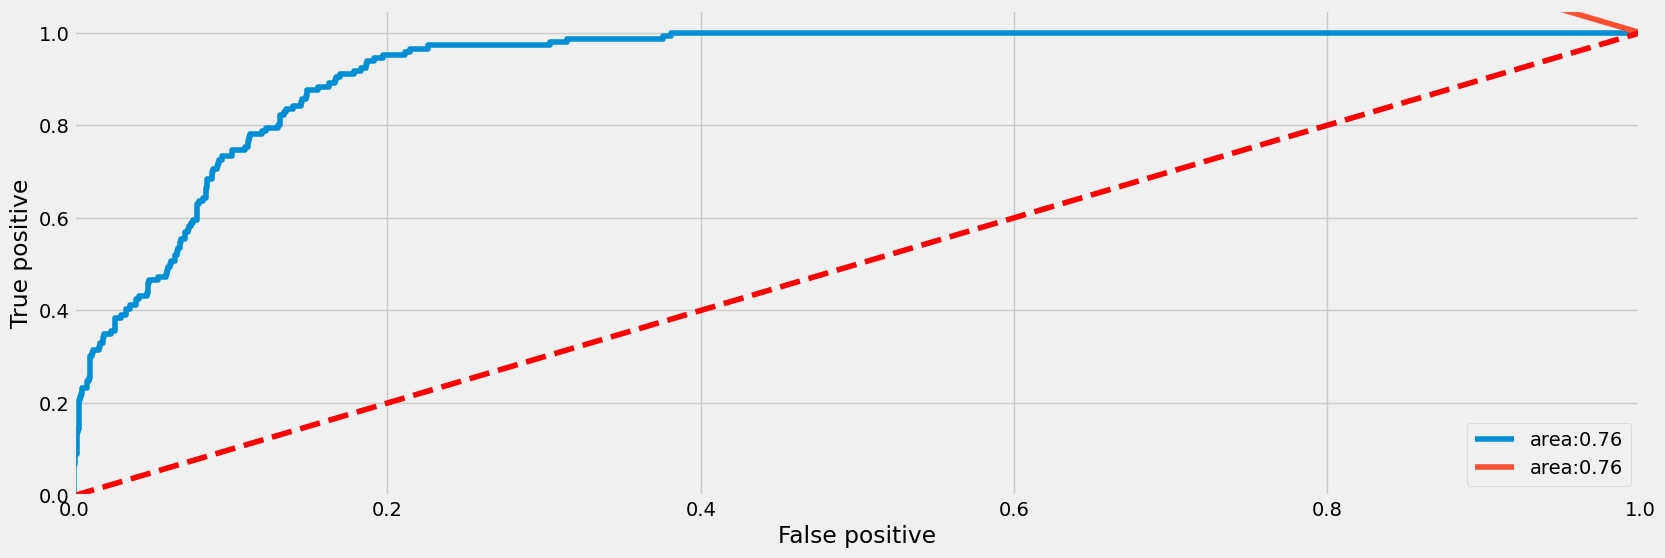

In [54]:
nb = GaussianNB()
nb.fit(x_train, y_train)

print('Naive Bayes Classifier Scores\n\n')
print('NB accuracy for train set: {0:.3f}'.format(nb.score(x_train, y_train)))
print('NB accuracy for test set: {0:.3f}'.format(nb.score(x_test, y_test)))

y_true, y_pred = y_test, nb.predict(x_test)

#Confusion matrix
print("\nConfusion matrix\n{}\n".format(confusion_matrix(y_true, y_pred)))

#Accuracy Score
print("\nAccuracy Score:{}\n".format(accuracy_score(y_true, y_pred).round(2)))

#Classification report
print("\nClassification report{}\n".format(classification_report(y_true, y_pred)))

#ROC AOC curve
roc_aoc = roc_auc_score(y_test, nb.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, nb.predict_proba(x_test)[:,1])

fig = plt.figure(figsize = (18,6))
plt.plot(fpr, tpr, threshold, label = 'area:{}'.format(roc_aoc.round(2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.legend(loc = 'lower right')
plt.show()

Oversampling and K-NN

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

In [57]:
sm = SMOTE(random_state = 42, sampling_strategy = 'minority')
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

unique, counts = np.unique(y_train, return_counts = True)
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(y_train_res, return_counts = True)
print(np.asarray((unique, counts)).T)

[[   0 3165]
 [   1  334]]
[[   0 3165]
 [   1 3165]]


k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

Best Score is:  0.993
k-Nearest Neighbor Classifier Scores after Scaling with Hyperparameter Tuning


k-NN accuracy for train set: 1.000
k-NN accuracy for test set: 0.970

Confusion matrix:
[[1346    8]
 [  37  109]]


Accuracy Score:0.97


Classification Report:              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1354
           1       0.93      0.75      0.83       146

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500
 



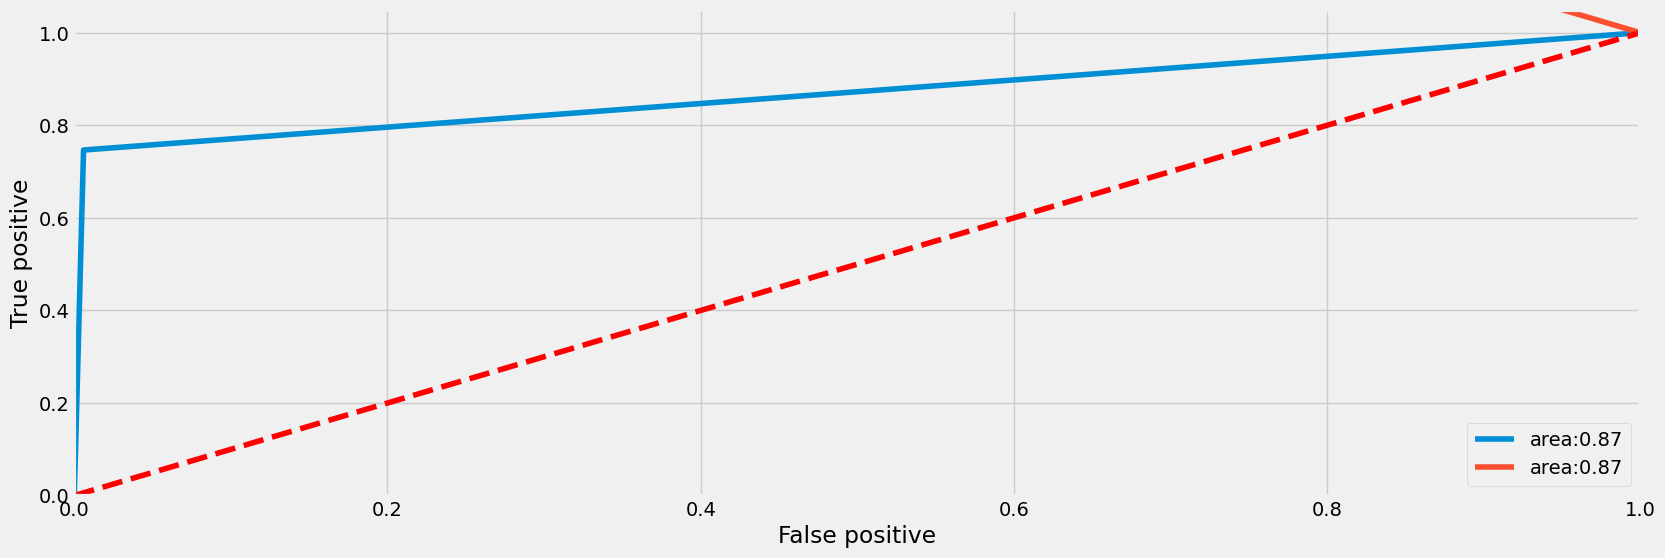

In [58]:
# KNN with hyperparameter tuning and Oversampling
knn = KNeighborsClassifier(n_jobs=-1)
params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree']}
skf = StratifiedKFold(n_splits = 10)

knn_hyper = GridSearchCV(knn, param_grid = params, n_jobs = -1, cv = skf)
knn_hyper.fit(x_train_res, y_train_res)

print('k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', knn_hyper.best_params_)
print('\nBest Score is: ', knn_hyper.best_score_.round(3))

print('k-Nearest Neighbor Classifier Scores after Scaling with Hyperparameter Tuning\n\n')
print('k-NN accuracy for train set: {:.3f}'.format(knn_hyper.score(x_train_res, y_train_res)))
print('k-NN accuracy for test set: {:.3f}'.format(knn_hyper.score(x_test, y_test)))

y_true, y_pred = y_test, knn_hyper.predict(x_test)

#Confusion matrix
print('\nConfusion matrix:\n{}\n'.format(confusion_matrix(y_true, y_pred)))

#Accuracy Score
print('\nAccuracy Score:{}\n'.format(accuracy_score(y_true, y_pred).round(2)))

#Classification Report
print("\nClassification Report:{} \n".format(classification_report(y_true, y_pred)))

#ROC AOC score
roc_aoc = roc_auc_score(y_test, knn_hyper.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, knn_hyper.predict_proba(x_test)[:,1])

fig = plt.figure(figsize = (18,6))
plt.plot(fpr, tpr, threshold, label = 'area:{}'.format(roc_aoc.round(2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.legend(loc = 'lower right')
plt.show()